In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))


import numpy as np
from scipy.optimize import differential_evolution
from stress_strain_analysis import stress_strain_analysis
from mesh import Mesh
import geometry

# Define your geometry and mesh
ReinforcedConcrete = geometry.ReinforcedConcreteColumn(width  = 300, 
                                                       height = 300, 
                                                       concrete_cover = 30,
                                                       rebar_diameter = 20,
                                                       rebar_spacing  = 50)
Mesh = Mesh(ReinforcedConcrete, "triangle", 25)

In [ ]:
# Initialize the stress-strain analysis
analysis = stress_strain_analysis(Mesh, Nx=80, My=13)

# Objective function for optimization
def objective_function(V):
    return analysis.find_strain_and_curvature(V)

# Bounds for variables (e.g., strain and curvature)
bounds = [(-0.01, 0.01), (-0.001, 0.001)]  # Example strain & curvature ranges
res=[]
for i in range(1000):
	# Optimize using Differential Evolution
	result = differential_evolution(objective_function, bounds, strategy='best1bin', maxiter=500, tol=1e-6)
	res.append(result.fun)

print(max(res))

print("Optimal solution:", result.x)
print("Number of iterations:", result.nit)
print("Minimum residual:", result.fun)
print("success:", result.success)

11744.565524113643
Optimal solution: [7.25605482e-06 7.36596738e-07]
Number of iterations: 106
Minimum residual: 1.4896245366244676e-06
success: True


7.549576819532167e-06 7.333199698571491e-07
Nx =  79.99999999999964 kN
My =  13.000000000000265 kNm


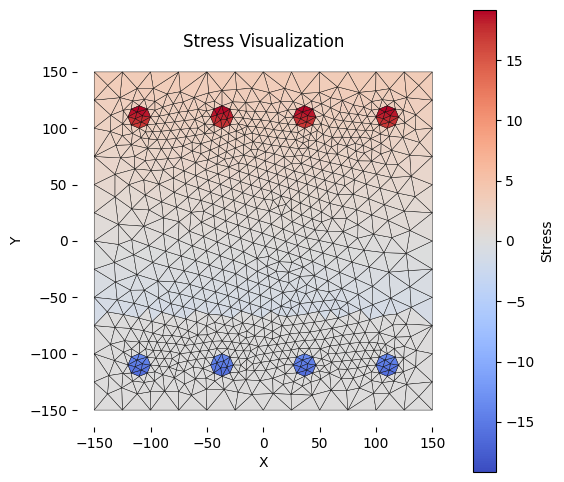

In [5]:
eps, xsi = result.x
print(eps, xsi)
analysis.set_strain_and_curvature(eps, xsi)
analysis.calculate_strains()
analysis.calculate_stresses()
print("Nx = ", analysis.get_section_forces()[0], "kN")
print("My = ", analysis.get_section_forces()[1], "kNm")
analysis.plot_stresses()